In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
digits=datasets.load_digits()

In [4]:
target=digits.target

In [6]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
target.shape

(1797,)

In [9]:
flattend_digits=digits.images.reshape((len(digits.images),-1))

In [11]:
flattend_digits.shape

(1797, 64)

In [13]:
digits.images.shape

(1797, 8, 8)

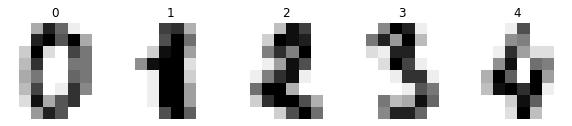

In [15]:
_,axes=plt.subplots(nrows=1,ncols=5,figsize=(10,4))
for ax,image,label in zip(axes,digits.images,target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('%i' %label)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(flattend_digits,target,test_size=0.2)

In [18]:
scaler=StandardScaler()
X_train_logistic=scaler.fit_transform(X_train)
X_test_logistic=scaler.transform(X_test)

In [19]:
logit=LogisticRegression(C=0.01,penalty='l1',solver='saga',tol=0.1,multi_class='multinomial')

In [23]:
logit.fit(X_train,y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [25]:
y_pred_logistic=logit.predict(X_test_logistic)

In [21]:
print('Accuracy:'+str(logit.score(X_test_logistic,y_test)))

Accuracy:0.8972222222222223


In [28]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_logistic, labels=label_names)

In [31]:
df_cm=pd.DataFrame(cmx)
df_cm

,0,1,2,3,4,5,6,7,8,9
0,34,0,0,0,0,0,0,0,0,0
1,0,31,0,0,0,1,0,1,0,4
2,0,0,31,0,0,0,0,0,0,0
3,0,0,0,33,0,1,0,2,1,0
4,0,0,0,0,37,0,0,2,0,0
5,1,0,0,0,0,35,0,0,0,1
6,1,2,0,0,1,0,36,0,0,0
7,0,0,0,0,0,0,0,25,0,0
8,0,4,1,2,0,2,2,1,23,4
9,1,1,0,0,0,1,0,1,0,37


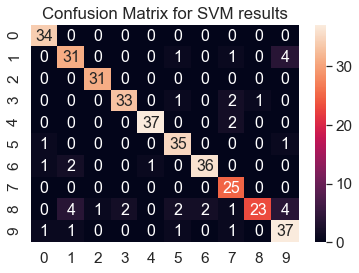

In [27]:
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

In [32]:
svm_classifier=svm.SVC(gamma='scale')

In [33]:
svm_classifier.fit(X_train,y_train)

SVC()

In [35]:
y_pred_svm=svm_classifier.predict(X_test)

In [36]:
print("Accuracy: "+str(accuracy_score(y_test,y_pred_svm)))

Accuracy: 0.9888888888888889


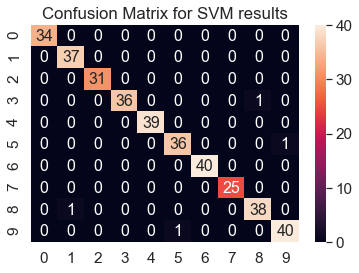

In [37]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cmx = confusion_matrix(y_test, y_pred_svm, labels=label_names)
df_cm = pd.DataFrame(cmx)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

In [40]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))


results = []
names = []
y = digits.target
for name, algo in algorithm:
    k_fold = model_selection.KFold(n_splits=10, random_state=10)
    if name == 'SVM':
        X = flattend_digits
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
    else:
        scaler = StandardScaler()
        X = scaler.fit_transform(flattend_digits)
        cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
        
    results.append(cv_results)
    names.append(name)

D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


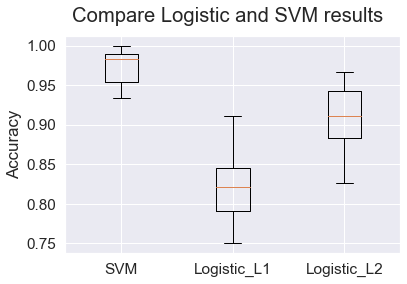

In [41]:
fig = plt.figure()
fig.suptitle('Compare Logistic and SVM results')
ax = fig.add_subplot()
plt.boxplot(results)
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()

In [42]:
results

[array([0.94444444, 1.        , 0.93333333, 0.98333333, 0.98333333,
        0.98888889, 0.98888889, 0.99441341, 0.96648045, 0.94972067]),
 array([0.75      , 0.88888889, 0.82777778, 0.8       , 0.83333333,
        0.85      , 0.91111111, 0.81564246, 0.7877095 , 0.77653631]),
 array([0.85      , 0.96666667, 0.92222222, 0.88333333, 0.88333333,
        0.91666667, 0.95      , 0.96089385, 0.82681564, 0.90502793])]